In [170]:
# Load Libraries
import pandas as pd
from matplotlib import pyplot
import numpy as np
import datetime
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA

In [171]:
# Get Data
series = pd.read_csv('https://raw.githubusercontent.com/veeranalytics/Forecasting-ARIMA-Python/master/Product_Sales.csv')

In [172]:
# Create a new column (Date) to capture date information in date format
series['Date'] = series['Month'].apply(lambda x: datetime.datetime.strptime(x, '%m/%d/%Y'))

# Delete original Date (Month) variable from dataframe
del series['Month']

# Set date as index
series.set_index('Date', inplace=True)

In [173]:
# take a look at the data (first five obs)
series.head()

,Sales
Date,
2015-01-01,266.0
2015-02-01,145.9
2015-03-01,183.1
2015-04-01,119.3
2015-05-01,180.3


In [174]:
# Take a look at variable data types-- only one variable is there- Sales, Date variable has become index
# Converting Date variable to index helps in performing forecasting easier.
series.dtypes

Sales    float64
dtype: object

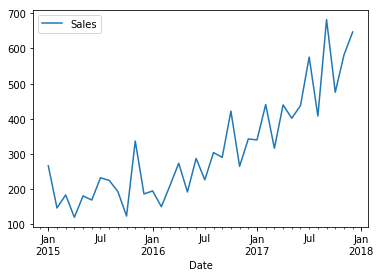

In [175]:
# Show plot
series.plot()
pyplot.show()

## Findings:
## As the the plot-- there is an increasing linear trend as well as some seasonality component.
## The series has a clear trend-- this suggests that the time series is not stationary and 
## will require differencing to make it stationary, at least a difference order of 1.
## Will fit an ARIMA model.

In [176]:
# Out of Sample Forecast Using ARIMA
# Divide series in to train ans test datasets
X = series.values
size = int(len(X) * 0.83)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

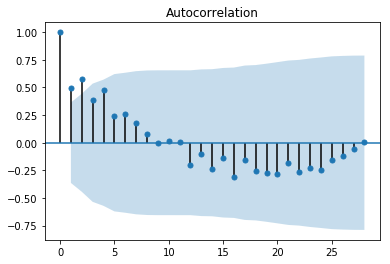

In [177]:
# Checking Autocorrelation factor
# Autocorrelation: is the correlation between series values that are k intervals apart.
acf_plot = plot_acf(train)

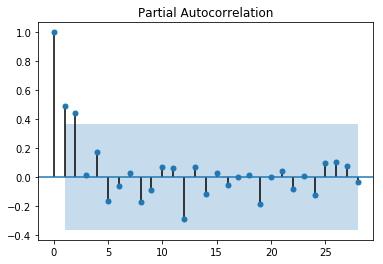

In [178]:
# Checking Partial Autocorrelation factor
# Autocorrelation: is the correlation between series values that are k intervals apart.
pacf_plot = plot_pacf(train)

## Findings:
## ACF: There is a positive correlation with the first 10 to 12 lags, perhaps significant for the first 3 lags only.
## This suggest of MA(3) model.
## PACF: The correlation is significant for the first 03 lags only, this suggests of AR(3) model.
## We will go with ARIMA(3,1,3) model.

In [179]:
# Fit ARIMA model
model = ARIMA(train, order=(3,1,3))
model_fit = model.fit(disp=0)
print(model_fit.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   28
Model:                 ARIMA(3, 1, 3)   Log Likelihood                -150.598
Method:                       css-mle   S.D. of innovations             46.893
Date:                Sun, 20 May 2018   AIC                            317.197
Time:                        15:19:21   BIC                            327.854
Sample:                             1   HQIC                           320.455
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.8651      3.336      2.658      0.015       2.327      15.403
ar.L1.D.y     -0.1049      0.251     -0.417      0.681      -0.597       0.388
ar.L2.D.y     -0.5019      0.157     -3.201      0.0

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


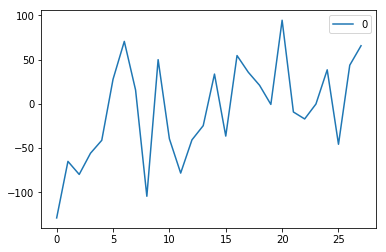

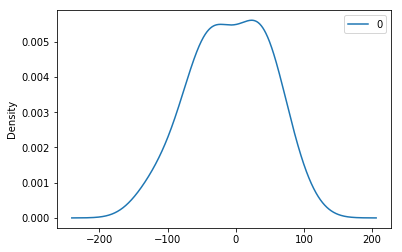

                0
count   28.000000
mean    -7.782527
std     56.419481
min   -128.965132
25%    -42.381254
50%     -4.960226
75%     36.342816
max     94.437553


In [136]:
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

In [180]:
# Predict sales for next 07 months to comapre with test data
start_index = 30
end_index = 35
predictions = model_fit.predict(start=start_index, end=end_index, typ='levels')

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


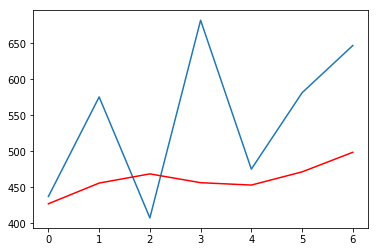

In [181]:
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

In [182]:
# Print Errors
error = ((predictions - test) ** 2).mean(axis=None)
print('Test MSE: %.3f' % error)

Test MSE: 16662.500


In [183]:
# Forecast sales for next 24 months
start_index = 36
end_index = 59
forecast = model_fit.predict(start=start_index, end=end_index, typ='levels')

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


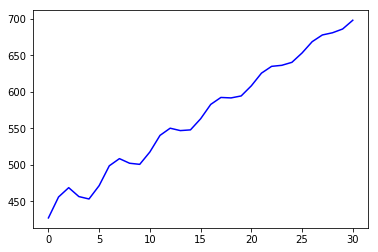

In [169]:
pyplot.plot(forecast, color='blue')
pyplot.show()